# Importar Librerias

In [1]:
## Tratamiento de datos
import pandas as pd
import numpy as np
## Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# 1. Obtener los datos

## a) Leer el archivo Messi.csv y cargarlo en el DataFrame llamado Messi

In [2]:
Messi=pd.read_csv('Messi.csv',encoding = 'latin1',delimiter= ',')

## b) Verificar los cinco primeros registros

In [3]:
Messi.head(5)

,Tournament,Matchday,Date,Venue,Club,Opponent,Position,Minute,Goal.Type,Assist
0,LaLiga,34,5/01/2005,Home,FC Barcelona,Albacete Balompi,CF,NaN,Left-footed shot,Ronaldinho Ga£cho
1,LaLiga,13,11/27/05,Home,FC Barcelona,Racing Santander,RW,51.0,Left-footed shot,Samuel Eto'o
2,LaLiga,19,1/15/06,Home,FC Barcelona,Athletic Bilbao,RW,50.0,Left-footed shot,Mark van Bommel
3,LaLiga,20,1/22/06,Home,FC Barcelona,Deportivo Alavs,CF,82.0,Left-footed shot,Ronaldinho Ga£cho
4,LaLiga,21,1/29/06,Away,FC Barcelona,RCD Mallorca,CF,75.0,Right-footed shot,Sylvinho


## c) ¿Cuántos registros hay?

In [4]:
Messi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tournament  479 non-null    object 
 1   Matchday    484 non-null    int64  
 2   Date        484 non-null    object 
 3   Venue       484 non-null    object 
 4   Club        484 non-null    object 
 5   Opponent    484 non-null    object 
 6   Position    484 non-null    object 
 7   Minute      461 non-null    float64
 8   Goal.Type   484 non-null    object 
 9   Assist      484 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 37.9+ KB


### Hay 484 registros

# d)¿Cuál es la estructura de los datos?

In [5]:
Messi.shape

(484, 10)

# 2. Análisis EDA

## a) ¿Qué variables son categóricas y cuáles numéricas?

### Categoricas

In [6]:
categoricas = Messi.select_dtypes(include=['object','category'])
categoricas.describe()

,Tournament,Date,Venue,Club,Opponent,Position,Goal.Type,Assist
count,479,484,484,484,484,484,484,484
unique,3,308,2,2,45,5,9,59
top,LaLiga,2/22/20,Home,FC Barcelona,Sevilla FC,CF,Left-footed shot,Not Applicable
freq,468,4,280,474,30,218,300,150


### Numericas

In [7]:
numericas= Messi.select_dtypes(include=['float64', 'int'])
numericas.describe()

,Matchday,Minute
count,484.000000,461.000000
mean,19.758264,50.963124
std,10.859227,25.338078
min,1.000000,3.000000
25%,11.000000,30.000000
50%,21.000000,53.000000
75%,28.000000,74.000000
max,38.000000,90.000000


### Las variables Matchday y Minute son numericas, mientras Tournament, Date, Venue, Club, Opponent, Position, Goal.Type y Assist son categoricas

## b)¿Están todas las variables completas o tenemos campos con valores nulos?

In [8]:
# Número de datos ausentes por variable
Messi.isna().sum().sort_values()

Matchday       0
Date           0
Venue          0
Club           0
Opponent       0
Position       0
Goal.Type      0
Assist         0
Tournament     5
Minute        23
dtype: int64

### Existen valores nulos en las variables Tournament y Minute

# 3.Imputación de la data

## a) Reemplazar los datos faltantes de la(s) variable(s) continua(s) con la media o mediana.

In [9]:
## Calcula los porcentajes de missings por variable

def fx_porc_missings(data, only_missings = False):

    df_vars_missings = pd.concat([pd.DataFrame(data.isnull().sum(), columns = ['n_nulos']),
           pd.DataFrame(100*data.isnull().sum()/len(data), columns = ['%Total'])], axis = 1)
    if only_missings:
        return(df_vars_missings[df_vars_missings["n_nulos"]!=0])
    else:
        return(df_vars_missings) 

In [10]:
## Missing de Variables
variables_perdidos = fx_porc_missings(numericas, only_missings = True)    
variables_perdidos

,n_nulos,%Total
Minute,23,4.752066


In [11]:
## Limpiar con la mediana
for column in numericas:
    Messi[column] = Messi[column].fillna(Messi[column].median()) 

In [12]:
Messi.isnull().sum()

Tournament    5
Matchday      0
Date          0
Venue         0
Club          0
Opponent      0
Position      0
Minute        0
Goal.Type     0
Assist        0
dtype: int64

## b) Reemplazar los datos faltantes de la(s) variable(s) categórica(s) con la moda.

In [13]:
## Missing de Variables
variables_perdidos = fx_porc_missings(categoricas, only_missings = True)    
#variables_perdidos.head()
variables_perdidos

,n_nulos,%Total
Tournament,5,1.033058


In [14]:
#Imputar variables
for column in categoricas:
    Messi[column] = Messi[column].fillna(Messi[column].mode()[0]) 

In [15]:
Messi.isnull().sum()

Tournament    0
Matchday      0
Date          0
Venue         0
Club          0
Opponent      0
Position      0
Minute        0
Goal.Type     0
Assist        0
dtype: int64

# 4. Gráficos

## a) ¿Existen variables con datos outliers?   

<Axes: >

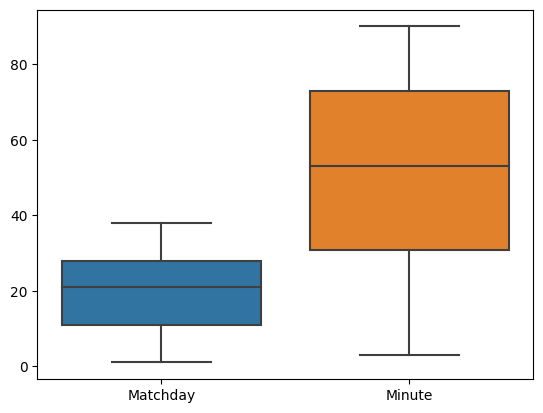

In [16]:
sns.boxplot(data=Messi)

### No, no existen variables outliers

## b) Realice un gráfico de dispersión de las variables Minute y Matchday, diferenciado según Venue

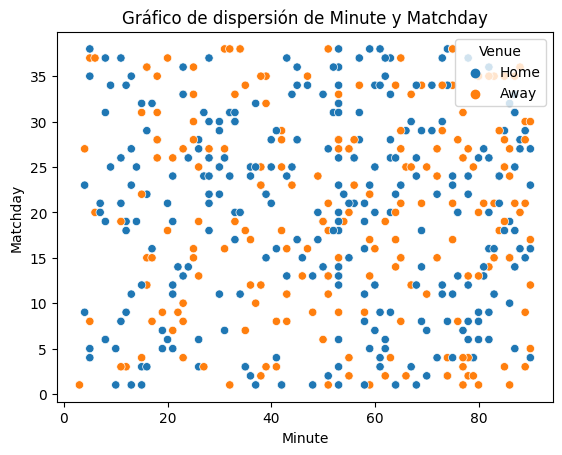

In [17]:
sns.scatterplot(data=Messi, x='Minute', y='Matchday', hue='Venue')
plt.title('Gráfico de dispersión de Minute y Matchday')
plt.show()

# 5. Correlación y Tablas

## a) Calcular la correlación de las variables continuas. Grafique e Interprete

In [18]:
correlacion = numericas.corr()
correlacion

,Matchday,Minute
Matchday,1.000000,-0.017226
Minute,-0.017226,1.000000


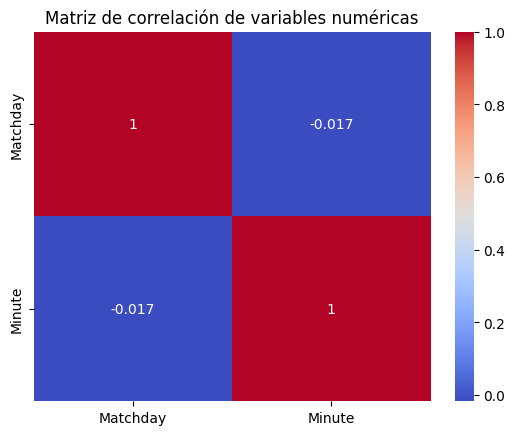

In [19]:
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación de variables numéricas')
plt.show()

### La correlación entre "Matchday" y "Minute" es -0.017. Este valor cercano a cero indica una correlación muy débil o casi inexistente entre estas dos variables. La correlación negativa sugiere que no hay una relación lineal clara entre el número de día del torneo y el minuto en el que se marcó el gol.

## b) Calcular la media de la variable Matchday según Tournament, interprete el resultado.

In [20]:
media_matchday_tournament = Messi.groupby('Tournament')['Matchday'].mean()
print("Media de Matchday por Tournament:\n", media_matchday_tournament)

Media de Matchday por Tournament:
 Tournament
LaLiga      30.000000
LaLiga      19.756871
Ligue 1     18.800000
Name: Matchday, dtype: float64


### La interpretación de estos resultados implica que los partidos en cada torneo se programan en diferentes momentos del torneo. En particular, los partidos en ambos torneos llamados "LaLiga" se juegan en momentos diferentes, ya que tienen medias de Matchday distintas. El hecho de que las medias sean diferentes indica que hay variaciones en la programación de los partidos dentro de cada torneo.